In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons

%config InlineBackend.figure_format = "retina"

In [38]:
import sys
sys.path.append("../modulo3/files")
import utils

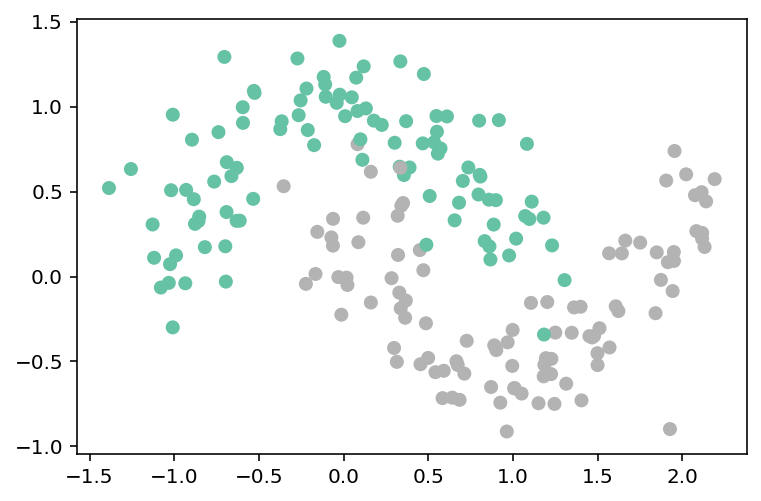

In [39]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import PolynomialFeatures

In [42]:
# Se crea el Pipeline del modelo
model = Pipeline(steps=[
    ("polinomio", PolynomialFeatures(degree = 30, include_bias = False)),
    ("transform", LogisticRegression(solver = 'lbfgs', penalty = 'none'))
])

In [43]:
# Se realiza un Bagging con 100 árboles
bagging_logreg = BaggingClassifier(model, n_estimators=100,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('polinomio',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('transform',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                   

In [44]:
# Entrenar el modelo
model.fit(X, y)

C:\Users\anbautista\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('polinomio',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('transform',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

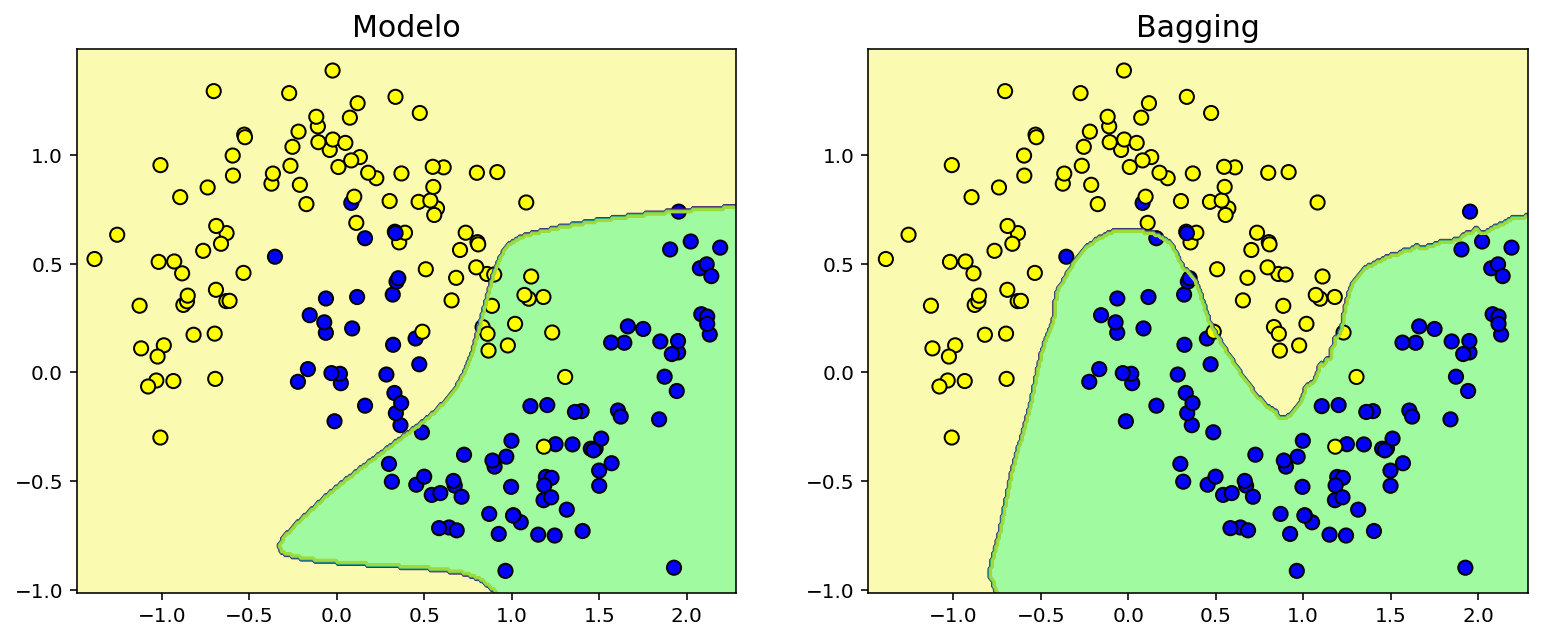

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_title("Modelo", fontsize = 15)
ax[1].set_title("Bagging", fontsize = 15)
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

El modelo Bagging es el que mejor se ajusta a los datos

In [46]:
# Prueba de predicción para el modelo y para bagging para generar los F1 Scoring
yhat_m = model.predict(X_test)
yhat_b = bagging_logreg.predict(X_test)

In [47]:
f1_score(y_test, yhat_m)

0.7567567567567567

In [48]:
f1_score(y_test, yhat_b)

0.9500000000000001

Como el f1_score es del 95% se obtiene que el Bagging ajusta con mejor precisión, mientras que el f1_score de modelo se ajusta al 75%